# Introduction to data science - Python

2019-08-27

In [1]:
# Import libaries
import os
import numpy as np
import pandas as pd

from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Designate input data
INDIR = "data/"
datafile = "modc_ae_2012.txt"
datafile_ave = "ave_log2_modc_ae_2012.txt"

In [2]:
X = [18.7103, 19.5864, 19.0913, 19.6176, 18.3535, 19.3708, 19.2411, 18.7447, 19.6554, 20.1722, 18.7621, 19.4203, 19.8431, 19.6063, 19.1312, 19.6309, 19.3373, 18.22, 19.167, 19.1908, 19.9454, 19.4662, 19.8465, 19.4658, 18.445, 19.7141, 18.8511, 18.831, 18.3799, 19.7284, 19.8314, 19.4222, 18.7622, 20.4409, 19.1529, 17.7998, 19.0078, 19.2157, 18.947, 19.5418, 19.9454, 19.6346, 18.4007, 19.127, 17.8615, 18.8835, 19.8252, 18.9186, 18.5735, 19.5492, 19.7822, 19.5076, 18.5093, 21.0646, 19.5701, 19.6512, 19.9295, 19.5274, 19.092, 16.7209, 19.1276, 18.1139, 19.4628, 19.7718, 19.301, 18.7855, 19.5914, 19.0588, 19.1228, 19.0519, 18.7518, 19.5578, 19.7133, 18.6093, 19.0295, 19.9849, 19.8133, 19.3702, 18.992, 19.5448, 19.4255, 19.383, 18.99, 20.2839, 18.8182, 19.9559, 19.1918, 19.815, 19.7966, 19.7011, 18.5407, 21.1235, 20.7118, 19.474, 20.2781, 19.8973, 19.5852, 18.7079, 19.0718, 20.1887]

In [3]:
Y = [15.1456, 16.6907, 13.7041, 13.3595, 13.4605, 13.7599, 13.2292, 15.0542, 17.5547, 13.0721, 14.4508, 13.5498, 11.0943, 15.7453, 14.5811, 15.0486, 13.5536, 13.0514, 18.9033, 13.4507, 13.0774, 13.472999999999999, 17.6656, 14.4048, 14.0548, 14.1752, 13.9674, 16.0953, 18.213, 17.1742, 14.4052, 14.367, 15.4772, 16.6466, 13.876, 14.418, 12.7861, 12.7505, 14.1374, 17.98, 14.5521, 14.7517, 14.6327, 14.860999999999999, 14.7525, 15.854000000000001, 13.4641, 12.8178, 14.6141, 14.145999999999999, 17.9251, 15.056, 13.9213, 13.8075, 14.7619, 15.6913, 13.7028, 14.7436, 13.8091, 14.578, 13.3033, 13.7391, 16.6819, 16.0013, 14.9508, 14.4106, 15.4443, 16.2574, 15.1084, 15.9944, 14.3142, 14.5851, 15.5699, 13.7463, 16.504, 23.27, 9.9658, 13.9809, 14.5995, 18.9871, 14.217, 14.7288, 13.2944, 20.343, 14.8264, 13.9879, 14.0883, 16.5853, 13.5979, 11.637, 14.5798, 19.0128, 14.4171, 13.0141, 13.5291, 15.849, 18.6107, 14.3473, 14.6311, 14.7727]

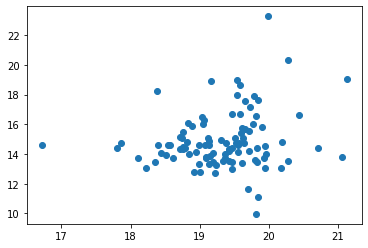

In [4]:
plt.plot(X,Y, "o")

In [5]:
# Get data and have a look
data = pd.read_csv(os.path.join(INDIR + datafile), sep="\t")
print(data.shape)
data.head()

(7995, 31)


,mz,time,mz.min,mz.max,p_0hr_01_1,p_0hr_01_3,p_0hr_01_5,p_0hr_02_1,p_0hr_02_3,p_0hr_02_5,...,mock_6hr_03_5,yf_6hr_01_1,yf_6hr_01_3,yf_6hr_01_5,yf_6hr_02_1,yf_6hr_02_3,yf_6hr_02_5,yf_6hr_03_1,yf_6hr_03_3,yf_6hr_03_5
0,85.02783,59.68820,85.02783,85.02783,15.5810,16.0425,15.3953,15.4143,15.7364,15.5532,...,17.5140,17.1734,16.9813,16.6582,16.8376,16.8148,17.2885,16.5967,16.4734,16.6048
1,85.04717,124.75120,85.04709,85.04739,14.4754,14.2709,14.3696,14.7142,14.8291,14.9959,...,16.6485,16.6961,16.3596,17.0661,15.2321,15.1615,16.5655,16.4316,16.1668,16.2193
2,85.06532,68.66651,85.06517,85.06547,14.4223,15.0515,15.1241,13.5224,16.7480,14.4095,...,9.7859,14.0113,15.8681,13.3699,9.9658,15.5703,16.5537,11.9470,10.3181,10.1656
3,85.10073,16.48022,85.10050,85.10078,14.5249,13.2573,13.5206,12.9044,11.4185,12.9223,...,13.3513,13.2977,13.1140,12.5569,12.9582,12.9960,13.0290,12.4184,13.0218,13.4085
4,86.05951,67.78485,86.05949,86.05980,10.6674,17.4235,17.4510,17.0197,17.0402,16.9958,...,18.5019,17.7391,17.9262,17.6089,17.5802,17.6529,17.7841,17.3077,10.7589,17.3895


In [6]:
data.iloc[:, 4].describe()

count    7995.000000
mean       16.091406
std         3.346315
min         5.669500
25%        13.991700
50%        16.262200
75%        18.549300
max        27.773700
Name: p_0hr_01_1, dtype: float64

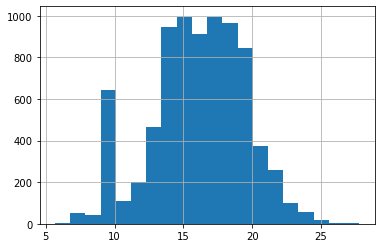

In [7]:
# Distribution of the intensity values in the first sample
# this is log2 transformed data
data.iloc[:, 4].hist(bins=20)

In [8]:
# check data in linear scale

linear_scale_data = 2**(data.iloc[:, 4])
linear_scale_data.describe()

count    7.995000e+03
mean     6.825831e+05
std      4.354430e+06
min      5.089669e+01
25%      1.629001e+04
50%      7.859773e+04
75%      3.836151e+05
max      2.294652e+08
Name: p_0hr_01_1, dtype: float64

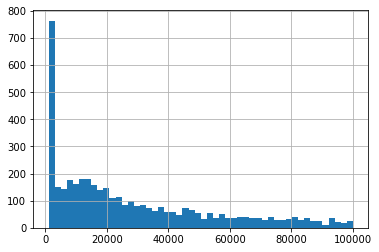

In [9]:
linear_scale_data.hist(bins=50, range=(1000,100000))